## Case study deep learning for sequential data (time series)

using RNN to predict whether a student has understood a lecture, based on EEG/brain data

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from models_utils import *
from keras.utils.layer_utils import count_params

In [8]:
X, Y = parse_and_separate_input_output('eeg/EEG_data.csv', output_list=["subject_understood"])

cols_remove = ["video_id", "subject_id"]
X = remove_cols(X, cols_remove)
X_train, X_test = separate_data(X, 0.8)
Y_train, Y_test = separate_data(Y, 0.8)

In [9]:
X_train

,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,EEG.O2,EEG.P8,EEG.T8,...,POW.F8.Theta,POW.F8.Alpha,POW.F8.BetaL,POW.F8.BetaH,POW.F8.Gamma,POW.AF4.Theta,POW.AF4.Alpha,POW.AF4.BetaL,POW.AF4.BetaH,POW.AF4.Gamma
0,4210.641113,4179.102539,4287.948730,4235.384766,4207.948730,4165.000000,4135.897461,4170.000000,4155.384766,4157.179688,...,3.758370,1.583895,0.504567,0.471979,0.138717,1.801014,1.504794,0.258570,0.435745,0.469483
1,4201.025879,4188.717773,4280.128418,4236.922852,4209.615234,4152.436035,4130.128418,4149.487305,4149.487305,4157.820313,...,4.580270,1.709560,0.606587,0.527616,0.155580,1.859177,1.379617,0.317579,0.468416,0.642560
2,4203.205078,4182.820313,4282.820313,4231.025879,4207.820313,4172.436035,4131.538574,4147.948730,4131.666504,4131.666504,...,5.230789,1.873591,0.795834,0.565414,0.170816,2.027946,1.283876,0.441925,0.494701,0.798197
3,4186.538574,4168.717773,4266.794922,4229.230957,4202.179688,4155.384766,4128.333496,4151.666504,4136.666504,4134.230957,...,5.472836,2.110017,1.021118,0.579656,0.180056,2.265952,1.306188,0.616881,0.506062,0.886495
4,4232.436035,4216.922852,4306.922852,4270.769043,4217.436035,4166.538574,4155.897461,4162.820313,4143.461426,4154.487305,...,5.209275,2.462552,1.230984,0.573620,0.181081,2.461205,1.522420,0.822598,0.498361,0.874455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55059,4264.230957,4200.641113,4298.077148,4198.205078,4170.769043,4191.025879,4181.153809,4180.128418,4154.487305,4170.897461,...,5.862211,7.742947,3.837855,3.291151,2.574155,8.355019,2.637025,2.240557,0.733537,0.836908
55060,4246.153809,4200.512695,4277.179688,4239.487305,4194.230957,4186.666504,4158.461426,4075.128174,4156.794922,4219.102539,...,5.935454,5.596169,3.347748,2.634743,1.975924,7.408735,3.023205,2.043536,0.708677,0.697755
55061,4260.897461,4240.641113,4288.846191,4134.230957,4238.461426,4197.820313,4170.769043,3968.461426,4190.641113,4236.410156,...,6.332962,4.004740,2.695586,2.157791,1.496049,7.235591,3.985690,1.820602,0.737164,0.701314
55062,4233.077148,4210.384766,4280.000000,4113.077148,4232.179688,4204.871582,4188.461426,4036.410156,4193.077148,4227.051270,...,6.802773,3.292297,2.000530,1.863722,1.185108,8.023961,5.662227,1.615477,0.812232,0.855821


In [10]:
input_shape = (84, 1)
model_simple = create_RNN(input_shape)
model_lstm = create_LSTM(input_shape)
model_gru = create_GRU(input_shape)
models = (model_simple, model_lstm, model_gru)
model_names = ('simple', 'lstm', 'gru')

In [11]:
for _model, _name in zip(models, model_names):
    param_count = get_num_params(_model)
    print(f"MANUALLY COMPUTED: {param_count} trainable parameters")

MANUALLY COMPUTED: 4288 trainable parameters
MANUALLY COMPUTED: 16960 trainable parameters
MANUALLY COMPUTED: 12928 trainable parameters


In [ ]:
model_simple, hist_simple, time_simple = train_model_rnn("simple", X, Y, input_shape, batch_size=32, epochs=5)
model_lstm, hist_lstm, time_lstm = train_model_rnn("lstm", X, Y, input_shape, batch_size=32, epochs=5)
model_gru, hist_gru, time_gru = train_model_rnn("gru", X, Y, input_shape, batch_size=32, epochs=5)

Epoch 1/5
2151/2151 [==============================] - 28s 12ms/step - loss: 0.2535 - accuracy: 0.8917
Epoch 2/5
 952/2151 [============>.................] - ETA: 14s - loss: 0.1733 - accuracy: 0.9274

1039/2151 [=============>................] - ETA: 14s - loss: 0.1737 - accuracy: 0.9267

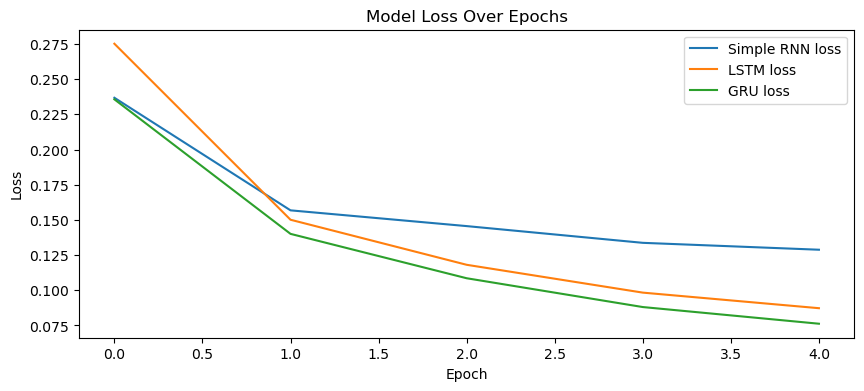

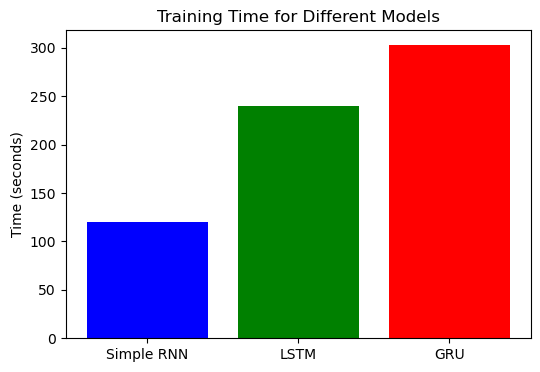

In [ ]:
plt.figure(figsize=(10, 4))

# Plot the losses from the histories
plt.plot(hist_simple.history['loss'], label='Simple RNN loss')
plt.plot(hist_lstm.history['loss'], label='LSTM loss')
plt.plot(hist_gru.history['loss'], label='GRU loss')

plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 3: Display training time for each model
times = [time_simple, time_lstm, time_gru]
models = ['Simple RNN', 'LSTM', 'GRU']

plt.figure(figsize=(6, 4))
plt.bar(models, times, color=['blue', 'green', 'red'])
plt.title('Training Time for Different Models')
plt.ylabel('Time (seconds)')
plt.show()